In [ ]:
# This file shows the gist of the market prediction model.
# I have implemented the model on only one company for simplicity. This can be scaled further to many companies and the data can be stored for further investment advise based on different sentiments and risk profiles

Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Data Collection

import yfinance as yf
import pandas as pd

# Set ticker for an Indian stock (e.g., Reliance Industries)
ticker = "RELIANCE.NS"

# Download historical stock data
df = yf.download(ticker, start="2022-01-01", end="2024-12-31", interval='1d')

# Save to CSV
df.to_csv("RELIANCE.csv")

# Read CSV back into a DataFrame (for further processing)
df = pd.read_csv("RELIANCE.csv")

# Skip first two rows which contain unwanted metadata
df = pd.read_csv("RELIANCE.csv", skiprows=2)

# Optional: reset column names if needed
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

print(df.head())


/tmp/ipython-input-6-3552417705.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2022-01-01", end="2024-12-31", interval='1d')
[*********************100%***********************]  1 of 1 completed

        Date        Close         High          Low         Open    Volume
0 2022-01-03  1098.149048  1100.022110  1079.738882  1080.401299   5421611
1 2022-01-04  1122.932129  1124.256963  1098.217641  1103.654004  10847728
2 2022-01-05  1128.185547  1131.566145  1111.442782  1124.713718  11643813
3 2022-01-06  1103.927979  1121.059107  1100.501704  1119.779949  14447422
4 2022-01-07  1112.836182  1122.909222  1101.666685  1110.529201  13112115


In [ ]:

df.head()

,Unnamed: 0,Date,Close,High,Low,Open,Volume
0,0,2022-01-03,1098.149048,1100.022110,1079.738882,1080.401299,5421611
1,1,2022-01-04,1122.932129,1124.256963,1098.217641,1103.654004,10847728
2,2,2022-01-05,1128.185547,1131.566145,1111.442782,1124.713718,11643813
3,3,2022-01-06,1103.928101,1121.059231,1100.501826,1119.780073,14447422
4,4,2022-01-07,1112.836182,1122.909222,1101.666685,1110.529201,13112115


In [ ]:

df.tail()

,Unnamed: 0,Date,Close,High,Low,Open,Volume
733,733,2024-12-23,1222.300049,1227.199951,1213.199951,1215.000000,10052824
734,734,2024-12-24,1222.750000,1233.550049,1221.000000,1222.300049,6734917
735,735,2024-12-26,1216.550049,1227.699951,1214.250000,1224.250000,10016178
736,736,2024-12-27,1221.050049,1227.900024,1217.000000,1218.300049,7000397
737,737,2024-12-30,1210.699951,1223.199951,1208.099976,1216.400024,8818766


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

,Close
0,1098.149048
1,1122.932129
2,1128.185547
3,1103.928101
4,1112.836182
...,...
733,1222.300049
734,1222.750000
735,1216.550049
736,1221.050049


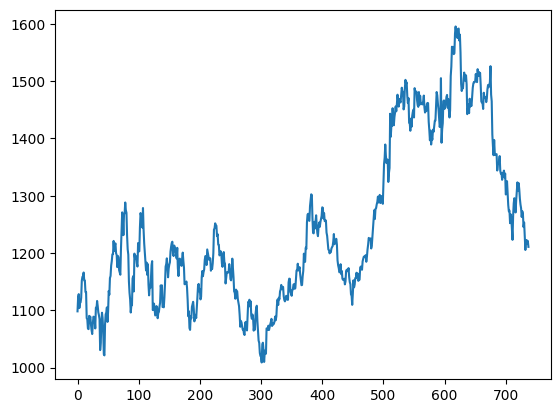

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

,Close
0,1098.149048
1,1122.932129
2,1128.185547
3,1103.928101
4,1112.836182
...,...
733,1222.300049
734,1222.750000
735,1216.550049
736,1221.050049


In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:

print(df1)

[[0.15218426]
 [0.19443233]
 [0.20338791]
 [0.16203569]
 [0.17722163]
 [0.17877922]
 [0.19244648]
 [0.24349427]
 [0.25455286]
 [0.25743414]
 [0.26775295]
 [0.24403948]
 [0.24388383]
 [0.20950154]
 [0.20981305]
 [0.13197532]
 [0.12835426]
 [0.10098061]
 [0.09922845]
 [0.13875089]
 [0.13259856]
 [0.13637528]
 [0.11238962]
 [0.0956848 ]
 [0.08462663]
 [0.11495939]
 [0.13633657]
 [0.13442876]
 [0.13080728]
 [0.10133104]
 [0.16316502]
 [0.15927114]
 [0.18306223]
 [0.16818822]
 [0.14910841]
 [0.14061959]
 [0.12897709]
 [0.03684947]
 [0.05881077]
 [0.11768502]
 [0.1480569 ]
 [0.13228705]
 [0.09120722]
 [0.0242336 ]
 [0.0210794 ]
 [0.11344071]
 [0.14315065]
 [0.14852387]
 [0.16386567]
 [0.12072237]
 [0.15179512]
 [0.21281108]
 [0.20167467]
 [0.25132114]
 [0.2575898 ]
 [0.28831191]
 [0.30170698]
 [0.32203266]
 [0.32249984]
 [0.36174989]
 [0.33200083]
 [0.34843264]
 [0.35454605]
 [0.32522547]
 [0.31977442]
 [0.28379541]
 [0.31712641]
 [0.31288231]
 [0.27460614]
 [0.26728557]
 [0.26121107]
 [0.33

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:

training_size,test_size

(479, 259)

In [ ]:
train_data

array([[0.15218426],
       [0.19443233],
       [0.20338791],
       [0.16203589],
       [0.17722163],
       [0.17877922],
       [0.19244648],
       [0.24349427],
       [0.25455286],
       [0.25743435],
       [0.26775274],
       [0.24403948],
       [0.24388362],
       [0.20950133],
       [0.20981285],
       [0.13197553],
       [0.12835426],
       [0.10098061],
       [0.09922824],
       [0.13875089],
       [0.13259836],
       [0.13637549],
       [0.11238942],
       [0.095685  ],
       [0.08462663],
       [0.11495939],
       [0.13633657],
       [0.13442876],
       [0.13080728],
       [0.10133104],
       [0.16316481],
       [0.15927114],
       [0.18306223],
       [0.16818801],
       [0.1491082 ],
       [0.14061959],
       [0.12897729],
       [0.03684926],
       [0.05881077],
       [0.11768502],
       [0.14805711],
       [0.13228705],
       [0.09120722],
       [0.02423381],
       [0.0210793 ],
       [0.11344092],
       [0.14315065],
       [0.148

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(378, 100)
(378,)


(None, None)

In [ ]:

print(X_test.shape), print(ytest.shape)

(158, 100)
(158,)


(None, None)

In [ ]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - loss: 0.0572 - val_loss: 0.0132
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - loss: 0.0123 - val_loss: 0.0736
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - loss: 0.0078 - val_loss: 0.1031
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - loss: 0.0071 - val_loss: 0.0382
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - loss: 0.0057 - val_loss: 0.0426
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.0054 - val_loss: 0.0646
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - loss: 0.0052 - val_loss: 0.0425
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - loss: 0.0051 - val_loss: 0.0305
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - loss: 0.0049 - val_loss: 0.0374
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - loss: 0.0043 - val_loss: 0.0228
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: 0.0038 - val_loss: 0.0191
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - loss: 0.0

In [ ]:

import tensorflow as tf

In [ ]:

tf.__version__

'2.18.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [ ]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1162.9571158267927

In [ ]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1382.9250184478483

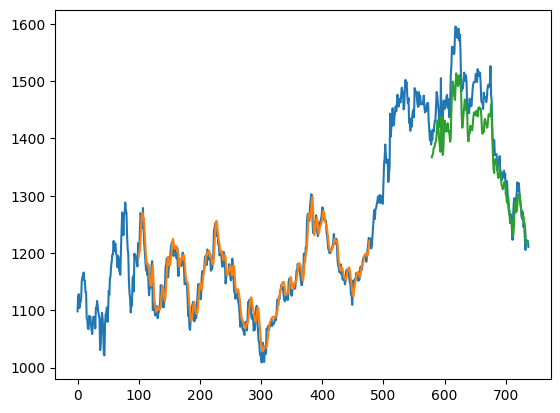

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:

len(test_data)

259

In [ ]:
x_input=test_data[159:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:

temp_input

[0.7539074522364702,
 0.7688153795538735,
 0.7421421759289413,
 0.7849131942023895,
 0.7616800093725999,
 0.7667768807263851,
 0.7637611676794307,
 0.7915389396767909,
 0.8174507236192221,
 0.8303211925842426,
 0.834966705837086,
 0.8340290296716446,
 0.8371827097176421,
 0.858704729188261,
 0.8379924074450573,
 0.8343274379320185,
 0.8728966015377806,
 0.8536332454270601,
 0.8649269784165925,
 0.852780888220303,
 0.8620290471516265,
 0.8252497088230417,
 0.7772619564636083,
 0.7732132597315118,
 0.7716365237560237,
 0.7545467201415381,
 0.8027902212820026,
 0.7905588121270288,
 0.7883852596307939,
 0.7900048631806451,
 0.7749179741450261,
 0.7855299878451698,
 0.8132315970647783,
 0.8259316362074516,
 0.819112778553394,
 0.8269117637572141,
 0.8337306214112712,
 0.8818463522087312,
 0.7972923508224021,
 0.7772619564636083,
 0.678644269260807,
 0.6437829427424469,
 0.6168483717709117,
 0.6622363930307313,
 0.6234541401232796,
 0.6174025288123166,
 0.6191923540894939,
 0.619916940953245

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.35405862]
101
1 day input [0.76881538 0.74214218 0.78491319 0.76168001 0.76677688 0.76376117
 0.79153894 0.81745072 0.83032119 0.83496671 0.83402903 0.83718271
 0.85870473 0.83799241 0.83432744 0.8728966  0.85363325 0.86492698
 0.85278089 0.86202905 0.82524971 0.77726196 0.77321326 0.77163652
 0.75454672 0.80279022 0.79055881 0.78838526 0.79000486 0.77491797
 0.78552999 0.8132316  0.82593164 0.81911278 0.82691176 0.83373062
 0.88184635 0.79729235 0.77726196 0.67864427 0.64378294 0.61684837
 0.66223639 0.62345414 0.61740253 0.61919235 0.61991694 0.57133258
 0.58846484 0.59247108 0.59737213 0.61424864 0.57018181 0.56195665
 0.5641302  0.54375874 0.55483938 0.56447106 0.57111949 0.55091867
 0.56216974 0.49994766 0.50531756 0.53949696 0.50591416 0.46858088
 0.4497437  0.45238609 0.41454151 0.4410497  0.42937245 0.39681244
 0.36501948 0.43729941 0.4741212  0.48895213 0.48469035 0.44650491
 0.48298563 0.51188066 0.53600242 0.5115396  0.53387152 0.51597202
 0.48801466 0.47045602 0.45911963

In [ ]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:

import matplotlib.pyplot as plt

In [ ]:
len(df1)

738

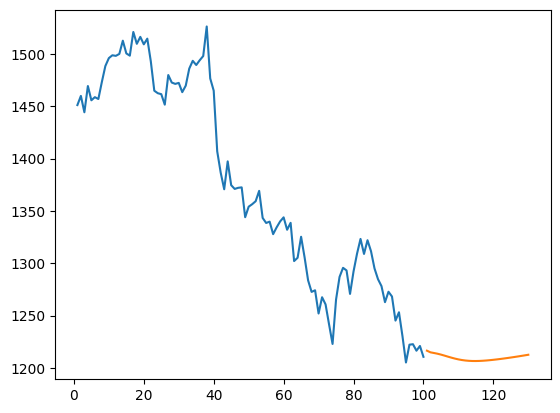

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[638:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

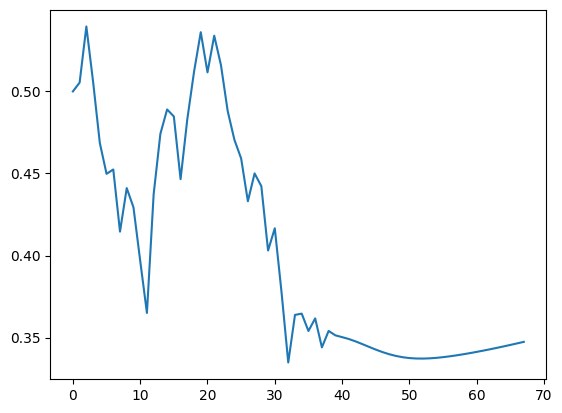

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[700:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

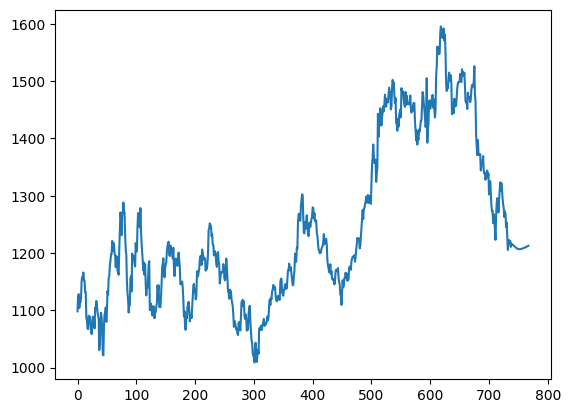

In [ ]:

plt.plot(df3)

In [ ]:
#trying method 2

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Use multiple features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = df[features]

# Normalize all features together
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create dataset with a sliding window
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step)])
        y.append(dataset[i + time_step][3])  # Index 3 = Close
    return np.array(X), np.array(y)

# Prepare sequences
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Train-test split (time-based)
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the improved LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile with smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform Close prices only
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]
train_predict = close_scaler.inverse_transform(train_predict)
test_predict = close_scaler.inverse_transform(test_predict)

# RMSE
from sklearn.metrics import mean_squared_error
import math

print("Train RMSE:", math.sqrt(mean_squared_error(close_scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict)))
print("Test RMSE:", math.sqrt(mean_squared_error(close_scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict)))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0978 - val_loss: 0.0209
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0232 - val_loss: 0.0559
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0139 - val_loss: 0.0242
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0080 - val_loss: 0.0057
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0082 - val_loss: 0.0087
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0071 - val_loss: 0.0047
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0059 - val_loss: 0.0086
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0062 - val_loss: 0.0047
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0059 - val_loss: 0.0118
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0057 - val_loss: 0.0088
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0051 - val_loss: 0.0103
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0043 - val_l

In [ ]:
# Inverse transform y_train and y_test to original Close prices
y_train_inv = close_scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
# 30-Day Forecast
x_input = X_test[-1]  # Last time window
temp_input = list(x_input)  # list of [60, 5]
future_output = []

for _ in range(30):
    x_batch = np.array(temp_input[-time_step:])
    x_batch = x_batch.reshape(1, time_step, X_test.shape[2])
    yhat = model.predict(x_batch, verbose=0)

    # Optional: add light noise to simulate real market fluctuations
    yhat_noisy = yhat + np.random.normal(loc=0.0, scale=0.001, size=yhat.shape)

    future_output.append(yhat_noisy[0])

    dummy_row = temp_input[-1].copy()
    dummy_row[3] = yhat_noisy  # Update Close only
    temp_input.append(dummy_row)

# Inverse scale predicted close prices
future_output = np.array(future_output)
future_output = close_scaler.inverse_transform(future_output)


/tmp/ipython-input-28-185038801.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dummy_row[3] = yhat_noisy  # Update Close only


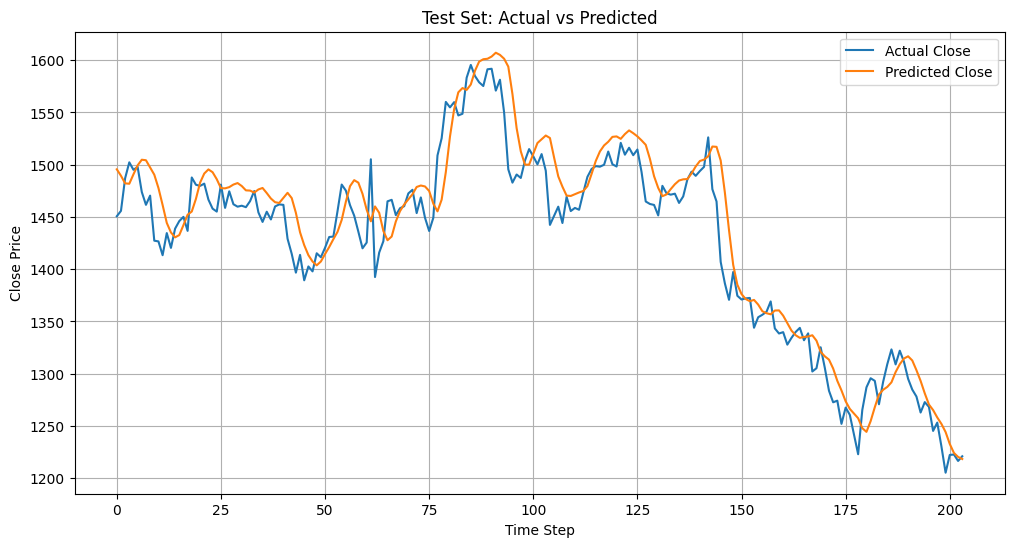

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual Close")
plt.plot(test_predict, label="Predicted Close")
plt.title("Test Set: Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


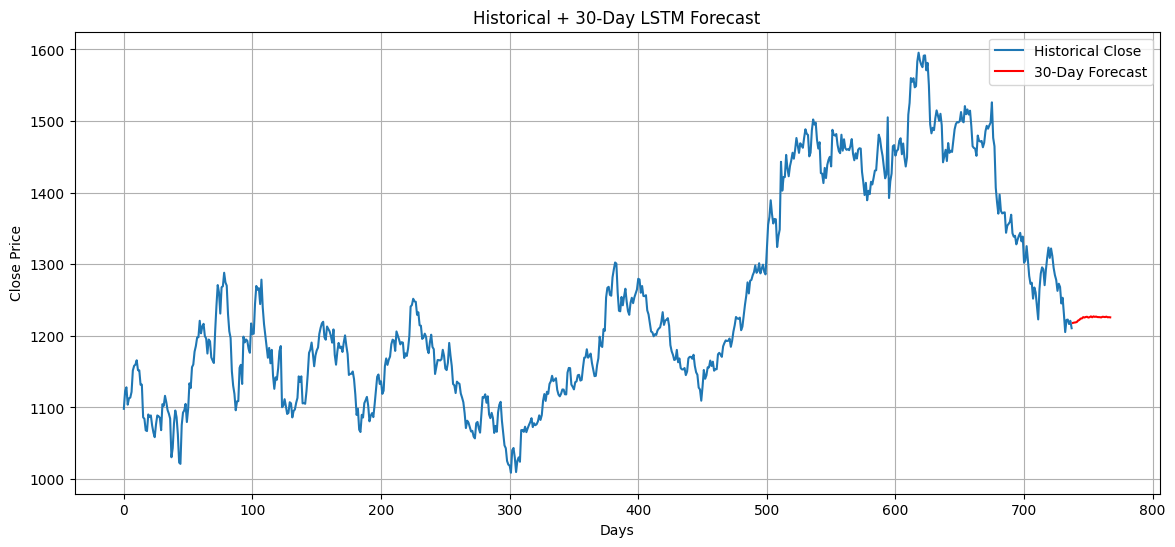

In [ ]:
# Generate range for next 30 days (not actual dates)
future_range = np.arange(len(df), len(df)+30)

# Plot full Close series + predictions
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Historical Close')
plt.plot(future_range, future_output, label='30-Day Forecast', color='red')
plt.title("Historical + 30-Day LSTM Forecast")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


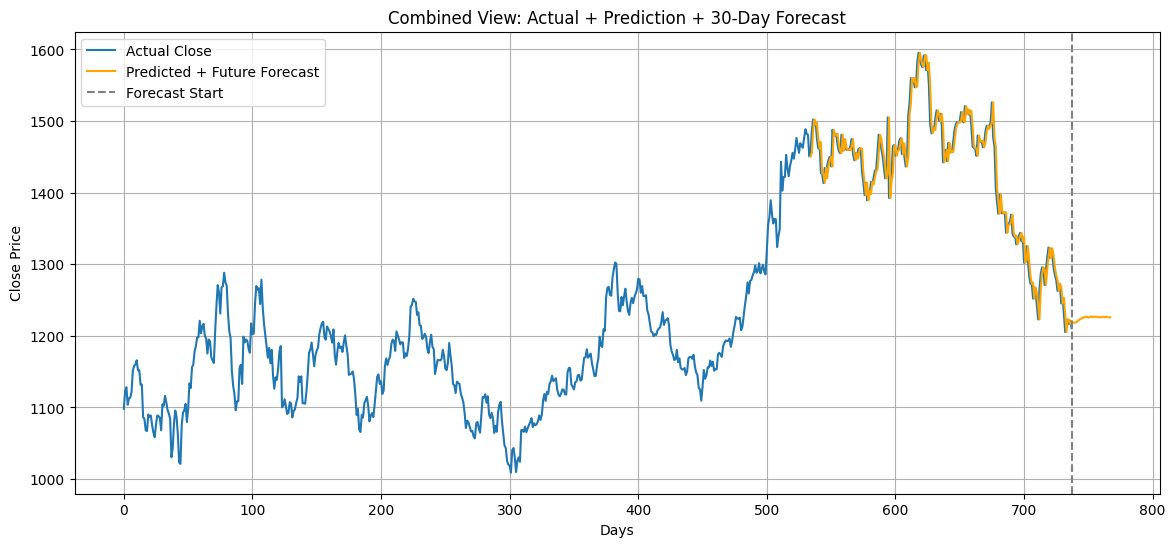

In [ ]:
plt.figure(figsize=(14, 6))
combined_close = np.concatenate((y_test_inv.flatten(), future_output.flatten()))
combined_range = np.arange(len(df) - len(y_test_inv), len(df) + 30)

plt.plot(np.arange(len(df)), df['Close'], label='Actual Close')
plt.plot(combined_range, combined_close, label='Predicted + Future Forecast', color='orange')
plt.axvline(x=len(df)-1, color='gray', linestyle='--', label='Forecast Start')
plt.title("Combined View: Actual + Prediction + 30-Day Forecast")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd

# Create future dates starting from last date in original data
future_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=100)

# Create DataFrame
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_output.flatten()
})

# Save to CSV
future_df.to_csv("future_30_day_predictions.csv", index=False)
print("✅ Saved predictions to future_100_day_predictions.csv")


ValueError: All arrays must be of the same length